In [1]:
import torch    

In [2]:
scalar = torch.tensor(3.14)
vector = torch.tensor([1, 2, 3, 4])
matrix = torch.tensor([[1, 2, 3], [4, 5, 6]])
tensor = torch.tensor([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

print(scalar)
print(vector)
print(matrix)
print(tensor)

tensor(3.1400)
tensor([1, 2, 3, 4])
tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]]])


In [3]:
tensor.size()

torch.Size([2, 2, 3])

>> #### Phương thức .view() trong PyTorch chỉ trả về  tensor có shape như mong muốn, nhưng không thay đổi dữ liệu. Nếu ta thay đổi dữ liệu ở 1 trong 2, dữ liệu ở  tensor còn lại sẽ thay đổi theo.

In [4]:
same_matrix = tensor.view(1,-1)
same_matrix

tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

In [5]:
same_matrix[0, 2] = 5
print("Tensor after view method and change values", same_matrix)
print("Original tensor", tensor)

Tensor after view method and change values tensor([[ 1,  2,  5,  4,  5,  6,  7,  8,  9, 10, 11, 12]])
Original tensor tensor([[[ 1,  2,  5],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]]])


>> #### Có thể dùng new_tensor() hoặc clone() để  tạo tensor mới, tuy nhiên ưu tiên dùng clone().

In [6]:
same_matrix = tensor.view(1,-1).clone().detach()
same_matrix

tensor([[ 1,  2,  5,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

>> #### Những method kết thúc với dấu _ thì sẽ replace source tensor.

>> ### Dynamic Computation Graphs

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# Our data was in Numpy arrays, but we need to transform them
# into PyTorch's Tensors and then we send them to the
# chosen device
import numpy as np
x_train = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
y_train = np.array([[1], [2], [3]])
x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

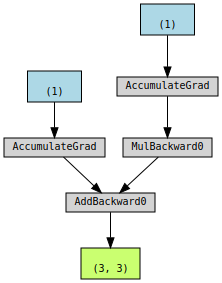

In [8]:
from torchviz import make_dot
# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, \
dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
dtype=torch.float, device=device)
# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train_tensor
# Step 2 - Computes the loss
error = (yhat - y_train_tensor)
loss = (error ** 2).mean()
# We can try plotting the graph for any python variable:
# yhat, error, loss...
make_dot(yhat)